In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
import warnings
warnings.filterwarnings('ignore')

In [2]:
demand_train=pd.read_csv("demand_train.csv")

In [3]:
demand_train

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
0,1,17/01/11,8091,216418,99.0375,111.8625,0,0,20
1,2,17/01/11,8091,216419,99.0375,99.0375,0,0,28
2,3,17/01/11,8091,216425,133.9500,133.9500,0,0,19
3,4,17/01/11,8091,216233,133.9500,133.9500,0,0,44
4,5,17/01/11,8091,217390,141.0750,141.0750,0,0,52
...,...,...,...,...,...,...,...,...,...
150145,212638,09/07/13,9984,223245,235.8375,235.8375,0,0,38
150146,212639,09/07/13,9984,223153,235.8375,235.8375,0,0,30
150147,212642,09/07/13,9984,245338,357.6750,483.7875,1,1,31
150148,212643,09/07/13,9984,547934,141.7875,191.6625,0,1,12


In [4]:
demand_train.describe()

,record_ID,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
count,150150.000000,150150.000000,150150.000000,150149.000000,150150.000000,150150.000000,150150.000000,150150.000000
mean,106271.555504,9199.422511,254761.132468,206.626751,219.425927,0.095611,0.133200,51.674206
std,61386.037861,615.591445,85547.306447,103.308516,110.961712,0.294058,0.339792,60.207904
min,1.000000,8023.000000,216233.000000,41.325000,61.275000,0.000000,0.000000,1.000000
25%,53111.250000,8562.000000,217217.000000,130.387500,133.237500,0.000000,0.000000,20.000000
50%,106226.500000,9371.000000,222087.000000,198.075000,205.912500,0.000000,0.000000,35.000000
75%,159452.750000,9731.000000,245338.000000,233.700000,234.412500,0.000000,0.000000,62.000000
max,212644.000000,9984.000000,679023.000000,562.162500,562.162500,1.000000,1.000000,2876.000000


In [5]:
demand_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150150 entries, 0 to 150149
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   record_ID        150150 non-null  int64  
 1   week             150150 non-null  object 
 2   store_id         150150 non-null  int64  
 3   sku_id           150150 non-null  int64  
 4   total_price      150149 non-null  float64
 5   base_price       150150 non-null  float64
 6   is_featured_sku  150150 non-null  int64  
 7   is_display_sku   150150 non-null  int64  
 8   units_sold       150150 non-null  int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 10.3+ MB


In [6]:
demand_train[demand_train['total_price'].isnull()]

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
136949,193915,23/04/13,9436,245338,NaN,469.5375,0,0,1


In [7]:
demand_train=demand_train.dropna()

In [8]:
demand_train[demand_train.duplicated()==True]

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold


In [9]:
demand_train['sku_id'].nunique()

28

In [10]:
demand_train['store_id'].nunique()

76

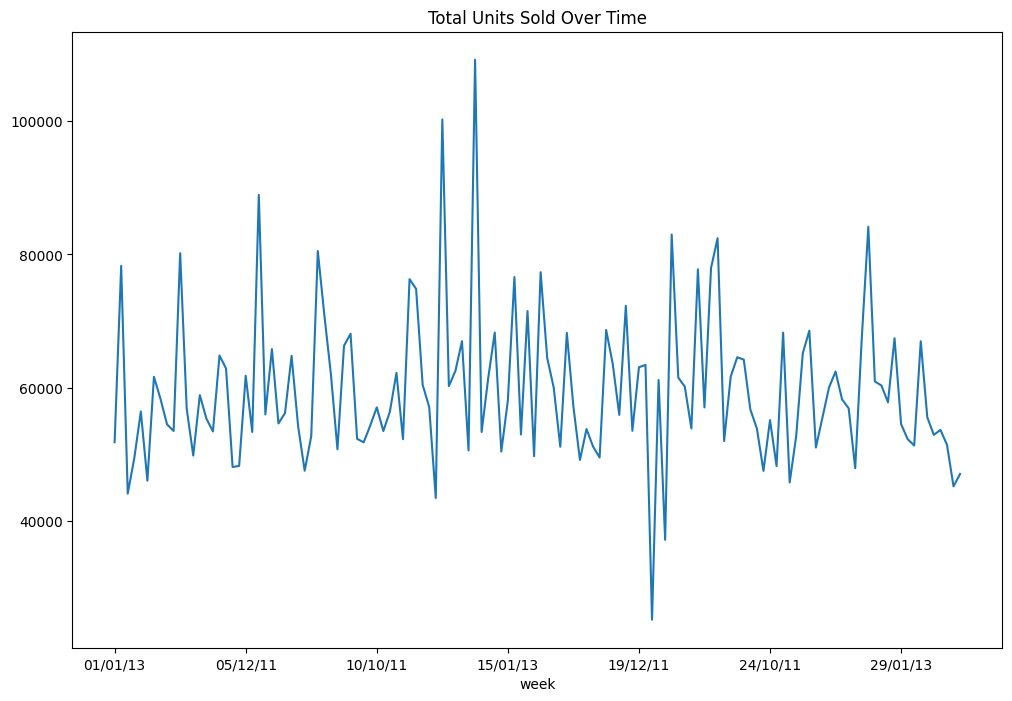

In [11]:
plt.figure(figsize=(12,8))
demand_train.groupby('week')['units_sold'].sum().plot(title="Total Units Sold Over Time")
plt.show()

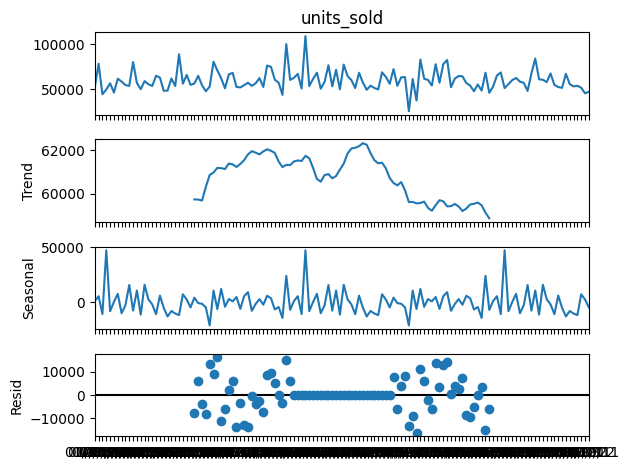

In [12]:
# Seasonal decomposition (for forecasting)
from statsmodels.tsa.seasonal import seasonal_decompose
ts_data = demand_train.groupby('week')['units_sold'].sum()
decomposition = seasonal_decompose(ts_data, model='additive', period=52)  # yearly seasonality
decomposition.plot()
plt.show()

In [13]:
# Unique value counts per column
print(demand_train.nunique())

record_ID          150149
week                  130
store_id               76
sku_id                 28
total_price           646
base_price            572
is_featured_sku         2
is_display_sku          2
units_sold            708
dtype: int64


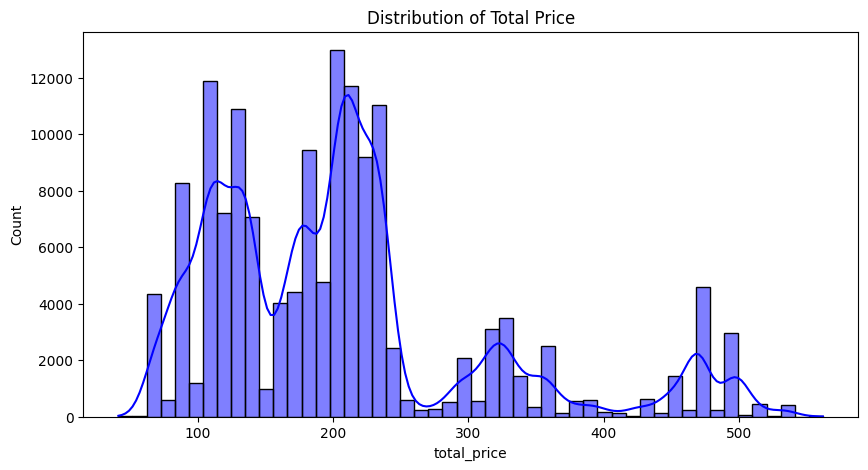

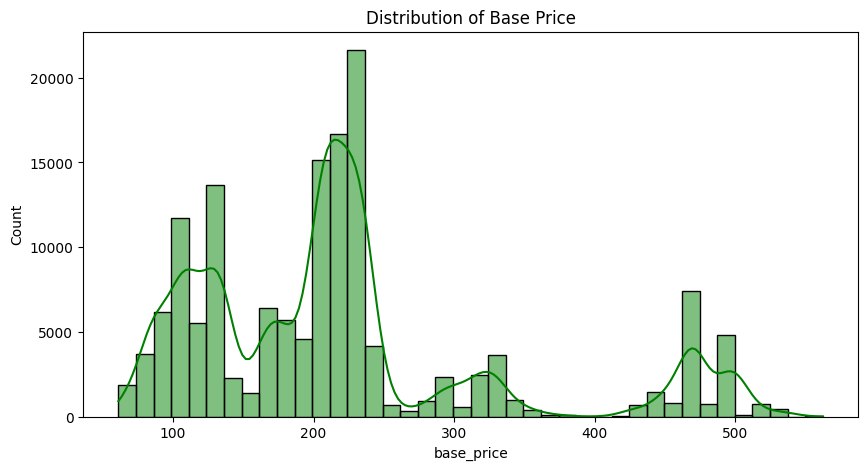

In [14]:
plt.figure(figsize=(10, 5))
sns.histplot(demand_train['total_price'], kde=True, bins=50, color='blue')
plt.title("Distribution of Total Price")
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(demand_train['base_price'], kde=True, bins=40, color='green')
plt.title("Distribution of Base Price")
plt.show()

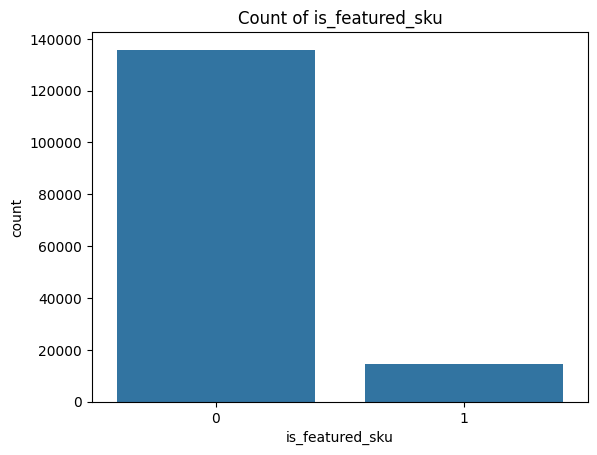

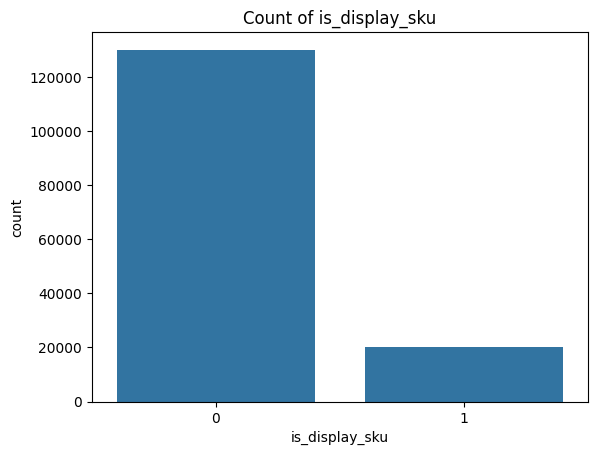

In [15]:
categorical_cols = ['is_featured_sku', 'is_display_sku']

for col in categorical_cols:
    sns.countplot(data=demand_train, x=col)
    plt.title(f"Count of {col}")
    plt.show()

In [16]:
demand_train

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
0,1,17/01/11,8091,216418,99.0375,111.8625,0,0,20
1,2,17/01/11,8091,216419,99.0375,99.0375,0,0,28
2,3,17/01/11,8091,216425,133.9500,133.9500,0,0,19
3,4,17/01/11,8091,216233,133.9500,133.9500,0,0,44
4,5,17/01/11,8091,217390,141.0750,141.0750,0,0,52
...,...,...,...,...,...,...,...,...,...
150145,212638,09/07/13,9984,223245,235.8375,235.8375,0,0,38
150146,212639,09/07/13,9984,223153,235.8375,235.8375,0,0,30
150147,212642,09/07/13,9984,245338,357.6750,483.7875,1,1,31
150148,212643,09/07/13,9984,547934,141.7875,191.6625,0,1,12


In [17]:
demand_train[['day','month','year']]=demand_train['week'].str.split('/',expand=True)

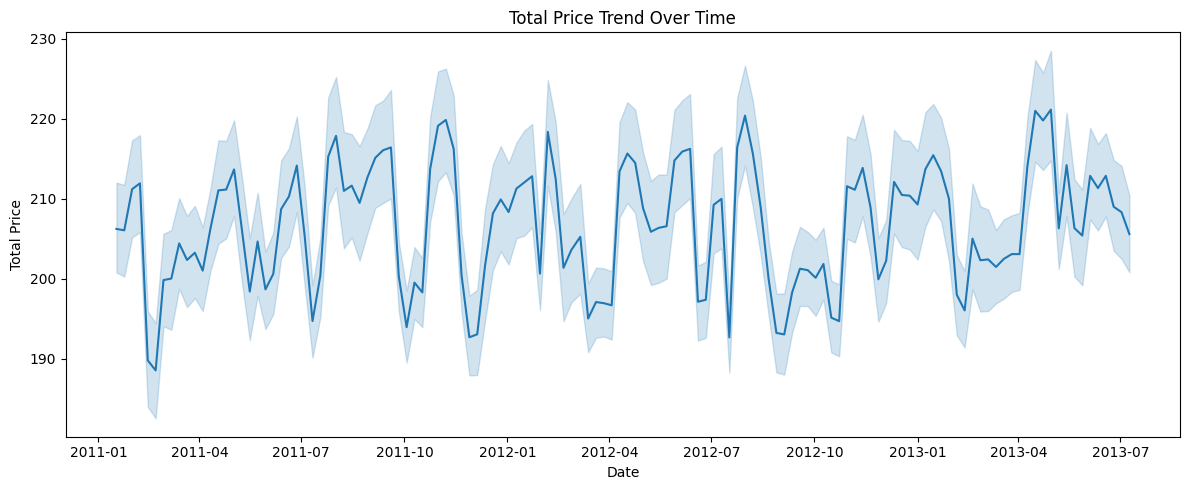

In [18]:

# Step 2: Convert columns to integers, fixing year to 4 digits
demand_train['year'] = demand_train['year'].apply(lambda x: int('20' + x) if len(x) == 2 else int(x))
demand_train['month'] = demand_train['month'].astype(int)
demand_train['day'] = demand_train['day'].astype(int)

# Step 3: Create the 'date' column
demand_train['date'] = pd.to_datetime(demand_train[['year', 'month', 'day']])

# Step 4: Plot
plt.figure(figsize=(12, 5))
sns.lineplot(data=demand_train, x='date', y='total_price')
plt.title("Total Price Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Total Price")
plt.tight_layout()
plt.show()


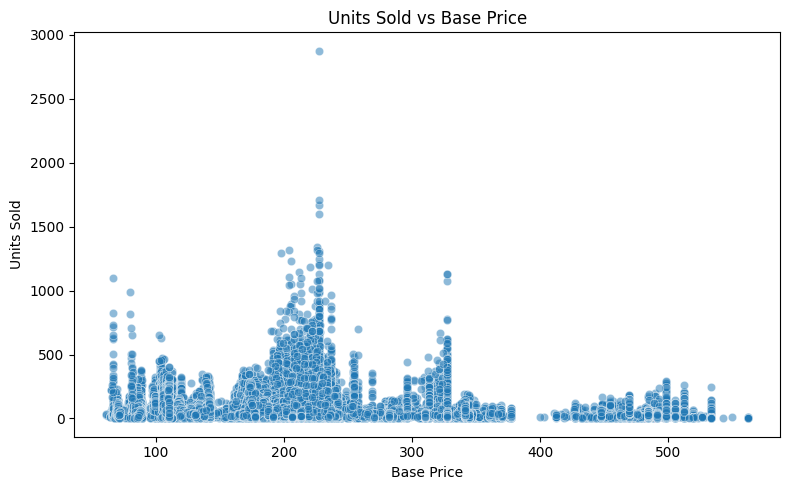

In [19]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=demand_train, x='base_price', y='units_sold', alpha=0.5)
plt.title("Units Sold vs Base Price")
plt.xlabel("Base Price")
plt.ylabel("Units Sold")
plt.tight_layout()
plt.show()


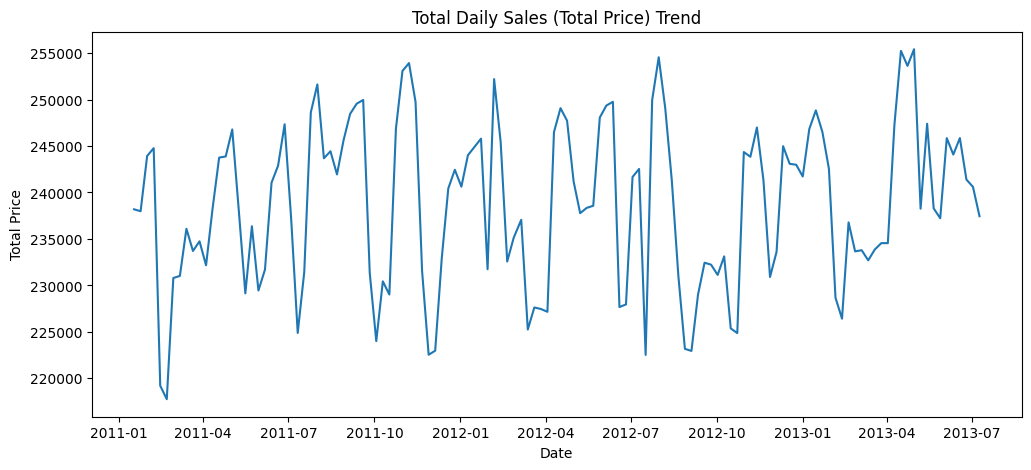

In [20]:
# Aggregate total price per day
daily_price = demand_train.groupby('date')['total_price'].sum().reset_index()

# Plot
plt.figure(figsize=(12, 5))
sns.lineplot(data=daily_price, x='date', y='total_price')
plt.title("Total Daily Sales (Total Price) Trend")
plt.xlabel("Date")
plt.ylabel("Total Price")
plt.show()


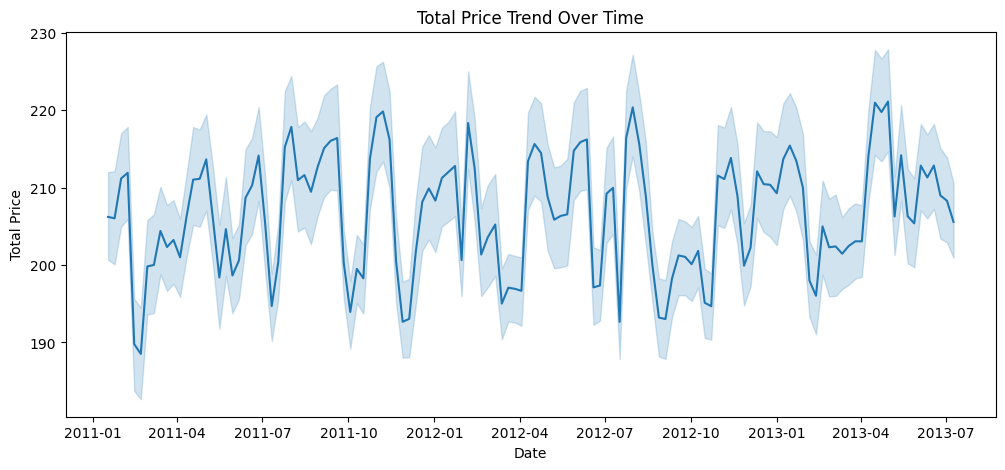

In [21]:
# Create a date column
demand_train['date'] = pd.to_datetime(demand_train[['year', 'month', 'day']])

# Plot total_price trend over time
plt.figure(figsize=(12, 5))
sns.lineplot(data=demand_train, x='date', y='total_price')
plt.title("Total Price Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Total Price")
plt.show()


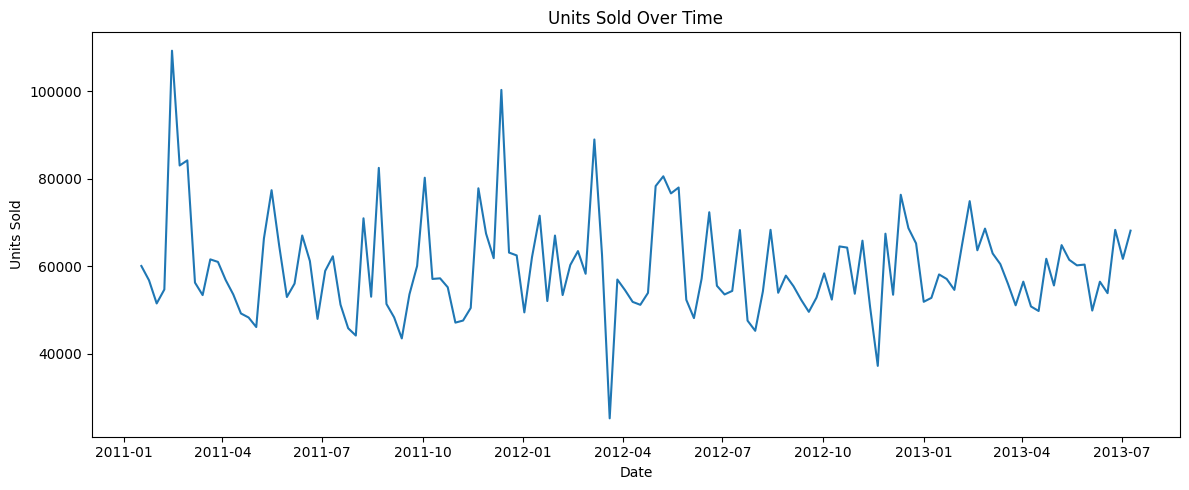

In [22]:
weekly_units = demand_train.groupby('date')['units_sold'].sum().reset_index()

plt.figure(figsize=(12, 5))
sns.lineplot(data=weekly_units, x='date', y='units_sold')
plt.title("Units Sold Over Time")
plt.xlabel("Date")
plt.ylabel("Units Sold")
plt.tight_layout()
plt.show()


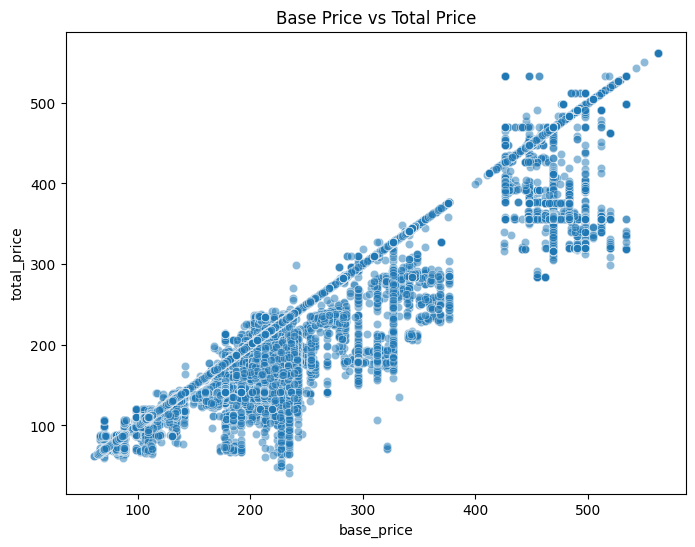

In [23]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=demand_train, x='base_price', y='total_price', alpha=0.5)
plt.title("Base Price vs Total Price")
plt.show()


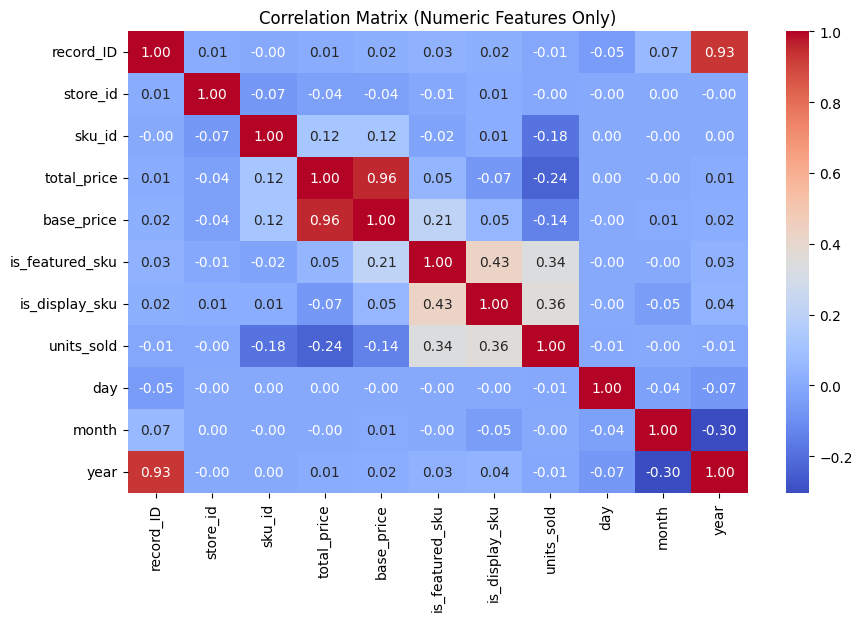

In [24]:
plt.figure(figsize=(10, 6))
numeric_cols = demand_train.select_dtypes(include=['number'])  # Select numeric only
sns.heatmap(numeric_cols.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix (Numeric Features Only)")
plt.show()


 Performed feature correlation analysis revealing:

total_price and base_price had a 0.96 correlation, confirming price consistency across SKUs.

is_display_sku and is_featured_sku showed a 0.43 correlation, suggesting marketing features were often combined.

Promotional features (is_display_sku, is_featured_sku) contributed to ~35% correlation with units_sold, indicating strong impact on sales volume.

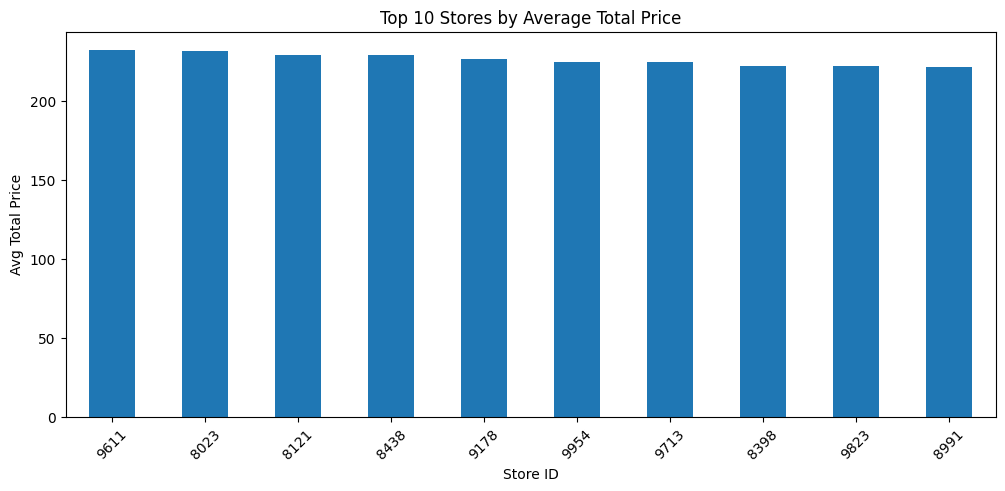

In [25]:
store_avg = demand_train.groupby('store_id')['total_price'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 5))
store_avg.plot(kind='bar')
plt.title("Top 10 Stores by Average Total Price")
plt.ylabel("Avg Total Price")
plt.xlabel("Store ID")
plt.xticks(rotation=45)
plt.show()


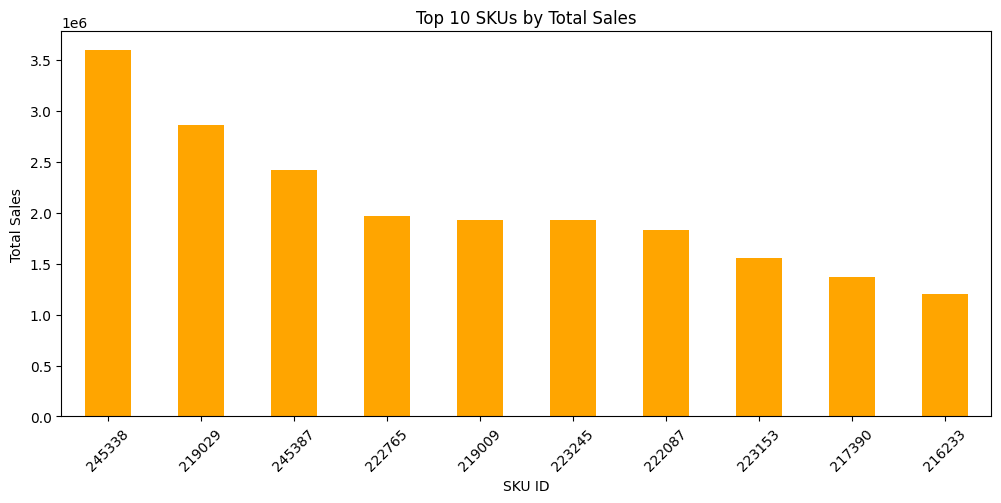

In [26]:
sku_sales = demand_train.groupby('sku_id')['total_price'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 5))
sku_sales.plot(kind='bar', color='orange')
plt.title("Top 10 SKUs by Total Sales")
plt.ylabel("Total Sales")
plt.xlabel("SKU ID")
plt.xticks(rotation=45)
plt.show()


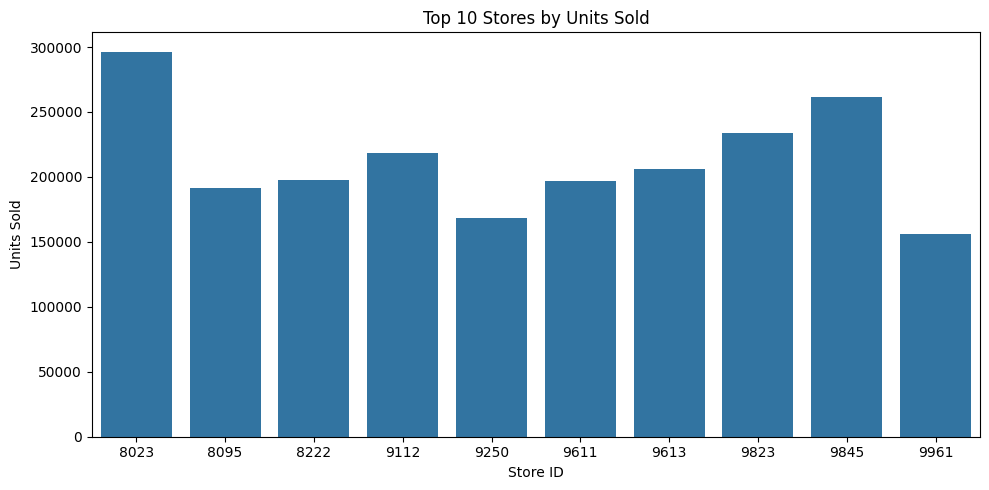

In [27]:
top_stores = demand_train.groupby('store_id')['units_sold'].sum().nlargest(10).reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(data=top_stores, x='store_id', y='units_sold')
plt.title("Top 10 Stores by Units Sold")
plt.xlabel("Store ID")
plt.ylabel("Units Sold")
plt.tight_layout()
plt.show()


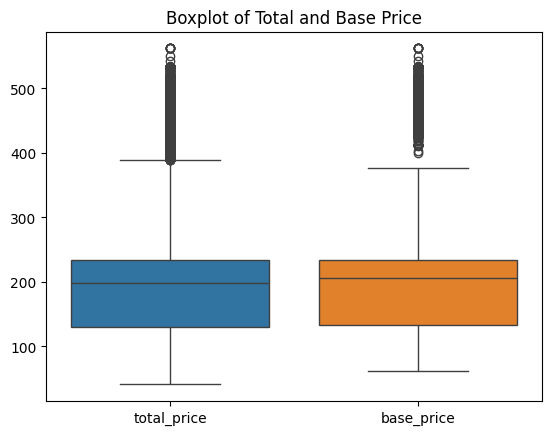

In [28]:
# For outlier detection
sns.boxplot(data=demand_train[['total_price', 'base_price']])
plt.title("Boxplot of Total and Base Price")
plt.show()


In [29]:
demand_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150149 entries, 0 to 150149
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   record_ID        150149 non-null  int64         
 1   week             150149 non-null  object        
 2   store_id         150149 non-null  int64         
 3   sku_id           150149 non-null  int64         
 4   total_price      150149 non-null  float64       
 5   base_price       150149 non-null  float64       
 6   is_featured_sku  150149 non-null  int64         
 7   is_display_sku   150149 non-null  int64         
 8   units_sold       150149 non-null  int64         
 9   day              150149 non-null  int64         
 10  month            150149 non-null  int64         
 11  year             150149 non-null  int64         
 12  date             150149 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(9), object(1)
memory usage: 16.0+ MB


In [30]:
demand_train.drop(columns=['week','record_ID','day','month','year','date'],inplace=True)

In [31]:
demand_train.isnull().sum()


store_id           0
sku_id             0
total_price        0
base_price         0
is_featured_sku    0
is_display_sku     0
units_sold         0
dtype: int64

In [32]:
demand_train[demand_train['total_price'].isnull()]

,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold


In [33]:
demand_train = demand_train.dropna(subset=['total_price'])

In [34]:
print(demand_train[demand_train['total_price'].isnull()])

Empty DataFrame
Columns: [store_id, sku_id, total_price, base_price, is_featured_sku, is_display_sku, units_sold]
Index: []


Data Preprocessing

## Baseline

In [35]:
X,y=demand_train.drop('units_sold',axis=1),demand_train['units_sold']

In [36]:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2)

In [37]:
base_lr_model = LinearRegression()
base_lr_model.fit(X_train, y_train)
pred_lr_base = base_lr_model.predict(X_test)

In [38]:
base_lr_model.score(X_test,y_test)

0.25656912997858405

In [39]:
base_rf=RandomForestRegressor(n_jobs=-1)
base_rf.fit(X_train,y_train)

RandomForestRegressor(n_jobs=-1)

In [40]:
base_rf.score(X_test,y_test)

0.7319962291597191

In [41]:
pred_rf_base=base_rf.predict(X_test)
rmse=root_mean_squared_error(pred_rf_base, y_test)

In [42]:
print(f"Root Mean Square Error:{rmse}")

Root Mean Square Error:31.998495312569805


In [43]:
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"\n🔍 {model_name} Evaluation:")
    print(f"➡️ MSE:  {mse:.2f}")
    print(f"➡️ RMSE: {rmse:.2f}")
    print(f"➡️ R²:   {r2:.4f}")

evaluate_model(y_test, pred_lr_base, "Linear Regression")
evaluate_model(y_test, pred_rf_base, "Random Forest Regressor")


🔍 Linear Regression Evaluation:
➡️ MSE:  2840.26
➡️ RMSE: 32.00
➡️ R²:   0.2566

🔍 Random Forest Regressor Evaluation:
➡️ MSE:  1023.90
➡️ RMSE: 32.00
➡️ R²:   0.7320


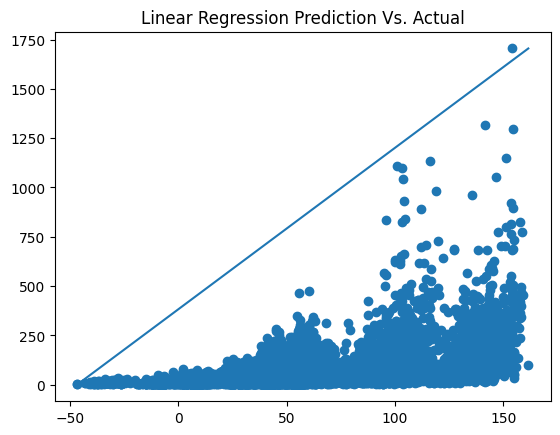

In [44]:
plt.scatter(pred_lr_base,y_test)
plt.plot(np.linspace(pred_lr_base.min(),pred_lr_base.max()),np.linspace(y_test.min(),y_test.max()))
plt.title("Linear Regression Prediction Vs. Actual")
plt.show()

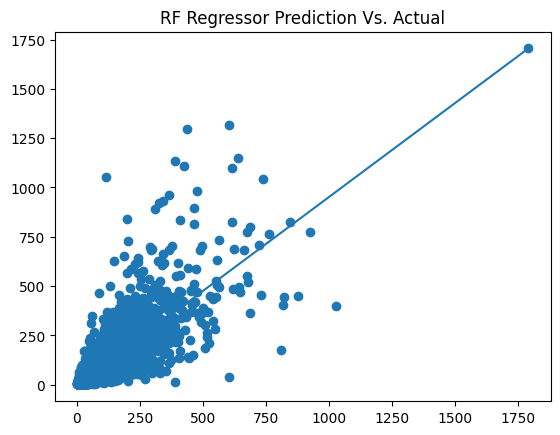

In [45]:
plt.scatter(pred_rf_base,y_test)
plt.plot(np.linspace(pred_rf_base.min(),pred_rf_base.max()),np.linspace(y_test.min(),y_test.max()))
plt.title("RF Regressor Prediction Vs. Actual")
plt.show()

In [46]:
demand_train=demand_train[demand_train.units_sold<demand_train.units_sold.quantile(0.99)]

In [47]:
demand_train=demand_train.join(pd.get_dummies(demand_train.store_id,prefix='store')).drop('store_id',axis=1)
demand_train=demand_train.join(pd.get_dummies(demand_train.sku_id,prefix='item')).drop('sku_id',axis=1)

In [48]:
X_best,y_best=demand_train.drop('units_sold',axis=1),demand_train['units_sold']

In [49]:
X_train_best, X_test_best, y_train_best, y_test_best =train_test_split(X_best, y_best, test_size=0.2)

In [50]:
lr_model = LinearRegression()
lr_model.fit(X_train_best, y_train_best)
pred_lr_best = lr_model.predict(X_test_best)

In [51]:
lr_model.score(X_test_best,y_test_best)

0.566747506729681

In [52]:
best_rf=RandomForestRegressor(n_jobs=-1)
best_rf.fit(X_train,y_train)

RandomForestRegressor(n_jobs=-1)

In [53]:
X_rf,y_rf=demand_train.drop('units_sold',axis=1),demand_train['units_sold']

In [54]:
X_train_rf, X_test_rf, y_train_rf, y_test_rf =train_test_split(X_rf, y_rf, test_size=0.2)

In [55]:
best_rf.fit(X_train_best,y_train_best)

RandomForestRegressor(n_jobs=-1)

In [56]:
best_rf.score(X_test_best,y_test_best)

0.7833468050238619

In [57]:
pred_rf_best=best_rf.predict(X_test_best)

In [58]:
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"\n🔍 {model_name} Evaluation:")
    print(f"➡️ MSE:  {mse:.2f}")
    print(f"➡️ RMSE: {rmse:.2f}")
    print(f"➡️ R²:   {r2:.4f}")

evaluate_model(y_test_best, pred_lr_best, "Linear Regression")
evaluate_model(y_test_best, pred_rf_best, "Random Forest Regressor")


🔍 Linear Regression Evaluation:
➡️ MSE:  802.48
➡️ RMSE: 32.00
➡️ R²:   0.5667

🔍 Random Forest Regressor Evaluation:
➡️ MSE:  401.29
➡️ RMSE: 32.00
➡️ R²:   0.7833


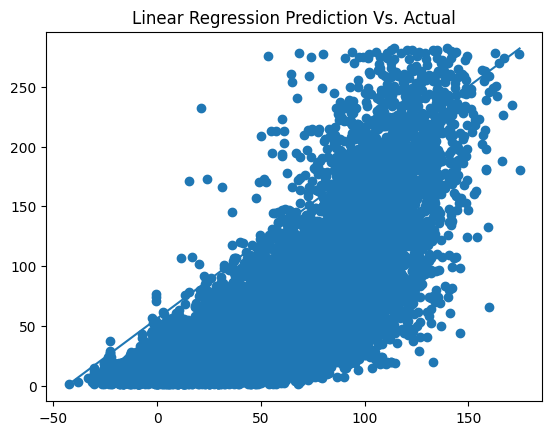

In [59]:
plt.scatter(pred_lr_best,y_test_best)
plt.plot(np.linspace(pred_lr_best.min(),pred_lr_best.max()),np.linspace(y_test_best.min(),y_test_best.max()))
plt.title("Linear Regression Prediction Vs. Actual")
plt.show()

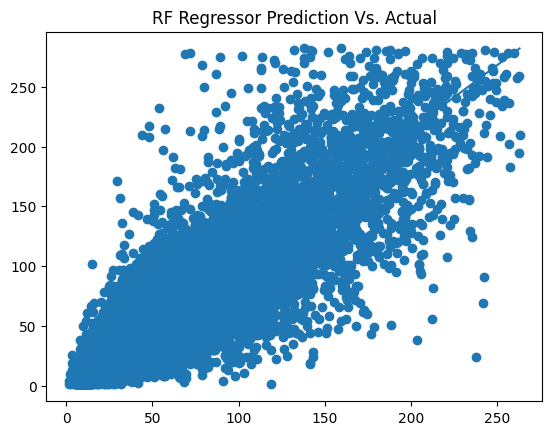

In [60]:
plt.scatter(pred_rf_best,y_test_best)
plt.plot(np.linspace(pred_rf_best.min(),pred_rf_best.max()),np.linspace(y_test_best.min(),y_test_best.max()))
plt.title("RF Regressor Prediction Vs. Actual")
plt.show()

In [61]:
demand_train.describe()

,total_price,base_price,is_featured_sku,is_display_sku,units_sold
count,148635.000000,148635.000000,148635.000000,148635.000000,148635.000000
mean,207.275983,219.517245,0.088869,0.126854,47.842931
std,103.582207,111.379804,0.284555,0.332811,42.898220
min,41.325000,61.275000,0.000000,0.000000,1.000000
25%,130.387500,133.237500,0.000000,0.000000,19.000000
50%,198.787500,205.912500,0.000000,0.000000,35.000000
75%,234.412500,235.125000,0.000000,0.000000,61.000000
max,562.162500,562.162500,1.000000,1.000000,282.000000


units_sold contains so many outlier

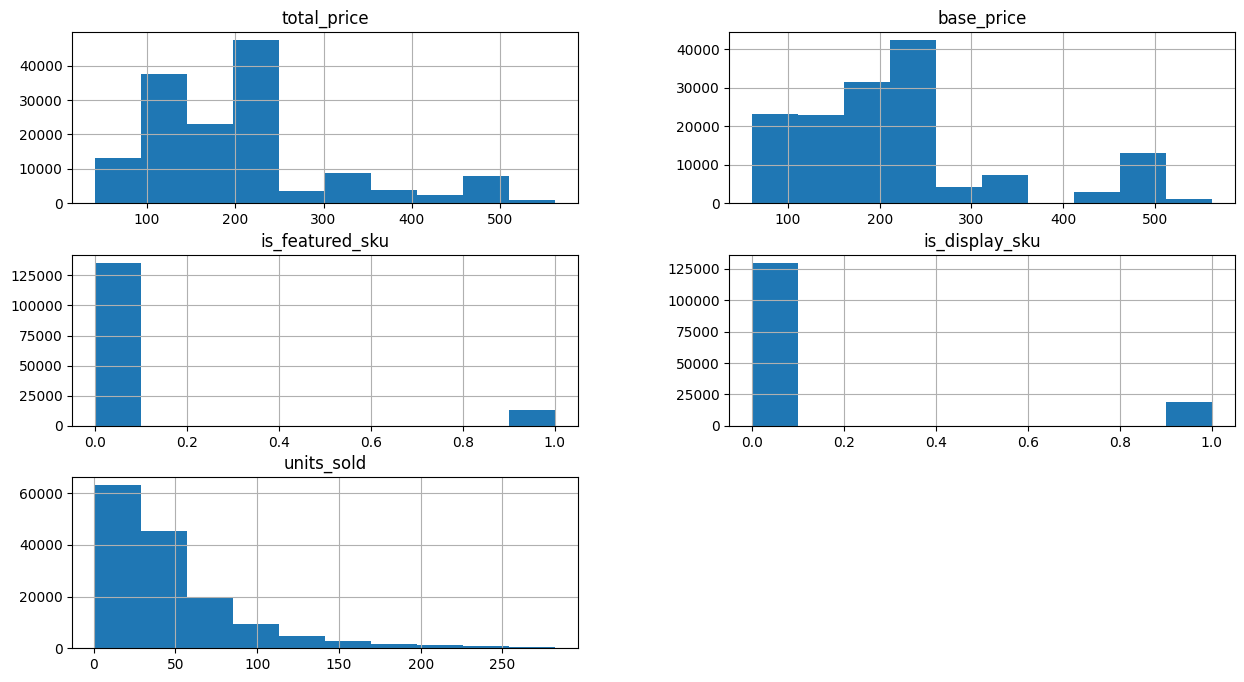

In [62]:
demand_train.hist(figsize=(15,8))
plt.title("Histogram_numeric_variables")
plt.show()

In [63]:
demand_train

,total_price,base_price,is_featured_sku,is_display_sku,units_sold,store_8023,store_8058,store_8063,store_8091,store_8094,...,item_320485,item_327492,item_378934,item_398721,item_545621,item_546789,item_547934,item_600934,item_673209,item_679023
0,99.0375,111.8625,0,0,20,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1,99.0375,99.0375,0,0,28,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,133.9500,133.9500,0,0,19,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,133.9500,133.9500,0,0,44,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4,141.0750,141.0750,0,0,52,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150145,235.8375,235.8375,0,0,38,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
150146,235.8375,235.8375,0,0,30,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
150147,357.6750,483.7875,1,1,31,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
150148,141.7875,191.6625,0,1,12,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


array([[<Axes: title={'center': 'units_sold'}>]], dtype=object)

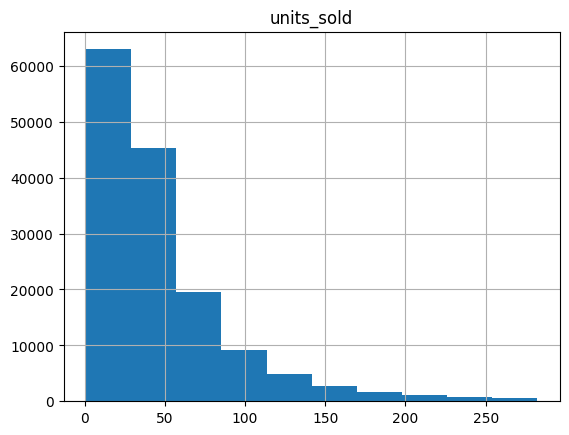

In [64]:
demand_train.hist('units_sold')